In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [54]:
insurance = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
insurance.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
# drop Loan_ID column
insurance.drop('Loan_ID', axis=1, inplace=True)
test.drop('Loan_ID', axis=1, inplace=True)
insurance.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis

### Continuous Variables

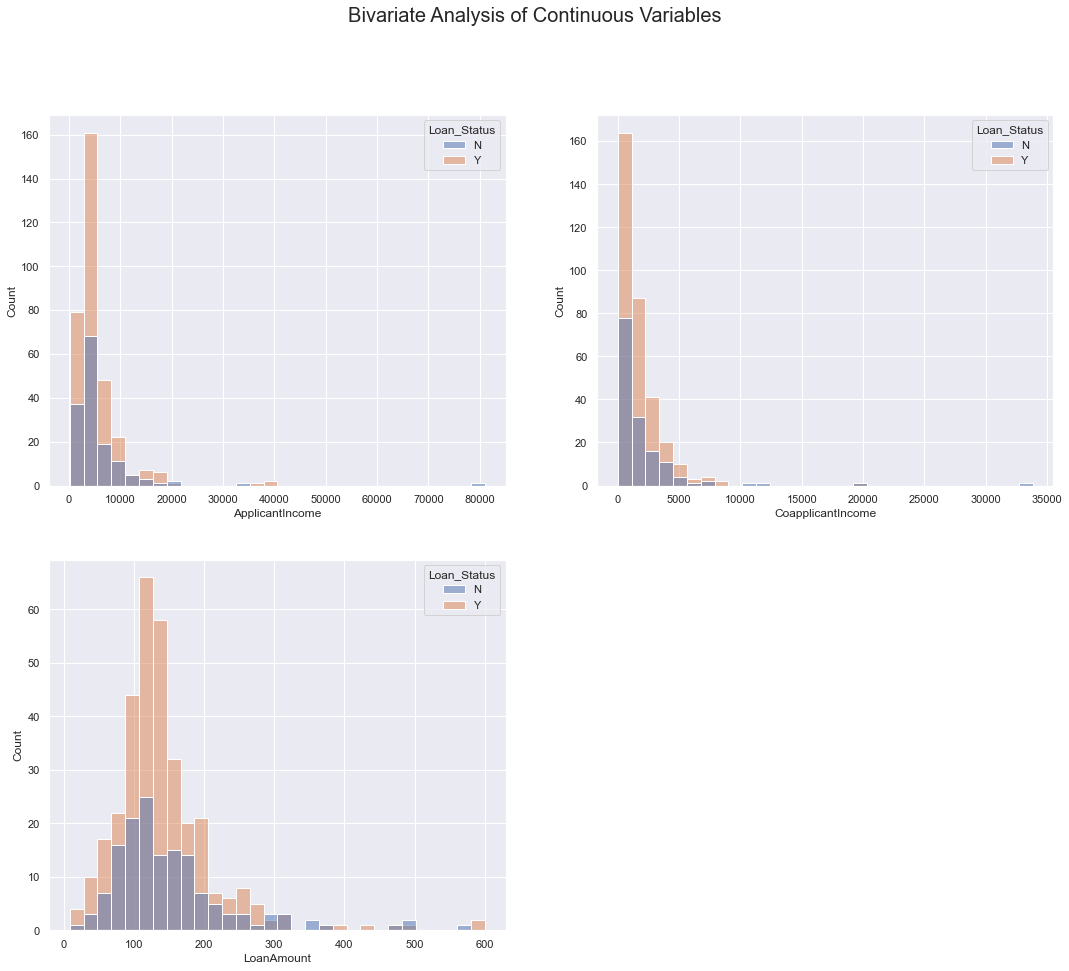

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
fig.suptitle('Bivariate Analysis of Continuous Variables', fontsize=20)

sns.histplot(ax=axes[0,0], data=insurance.dropna(), x='ApplicantIncome', hue='Loan_Status', bins=30)
sns.histplot(ax=axes[0,1], data=insurance.dropna(), x='CoapplicantIncome', hue='Loan_Status',bins=30)

sns.histplot(ax=axes[1,0], data=insurance.dropna(), x='LoanAmount', hue='Loan_Status',bins=30)
fig.delaxes(axes[1][1])
plt.show()

The `LoanAmount` is the closest to being normally distributed although it still has outliers. The rest of the continuous variables are skewed and have plenty of outliers. Using `Loan_Status` column to add another layer to the graphs, it can be seen that the each variable is similarly distributed when segregated by `Loan_Status = Y` and `Loan_Status = N`. 

The outliers in the continuous variables are showed in the boxplot below.

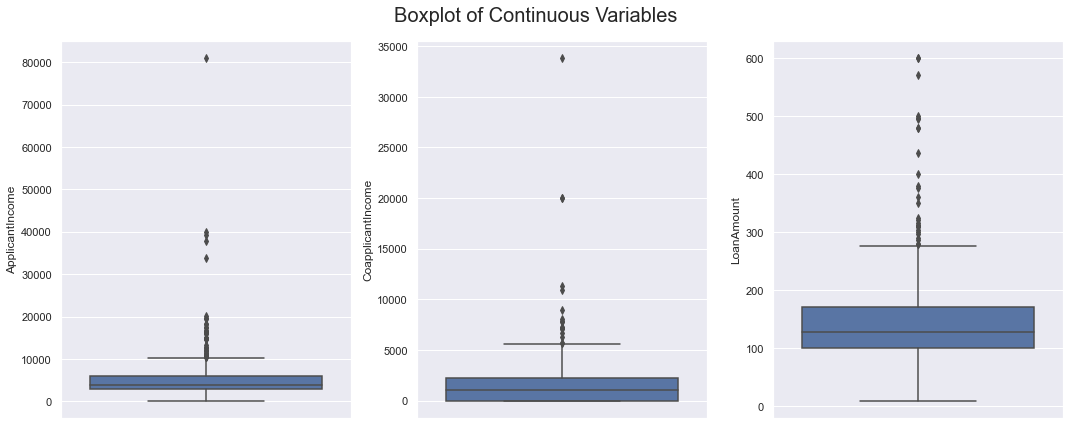

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Boxplot of Continuous Variables', fontsize=20)

sns.boxplot(ax=axes[0], data=insurance.dropna(), y='ApplicantIncome')
sns.boxplot(ax=axes[1], data=insurance.dropna(), y='CoapplicantIncome')

sns.boxplot(ax=axes[2], data=insurance.dropna(), y='LoanAmount')
# fig.delaxes(axes[1][1])
fig.tight_layout(pad=1.0)
plt.show()

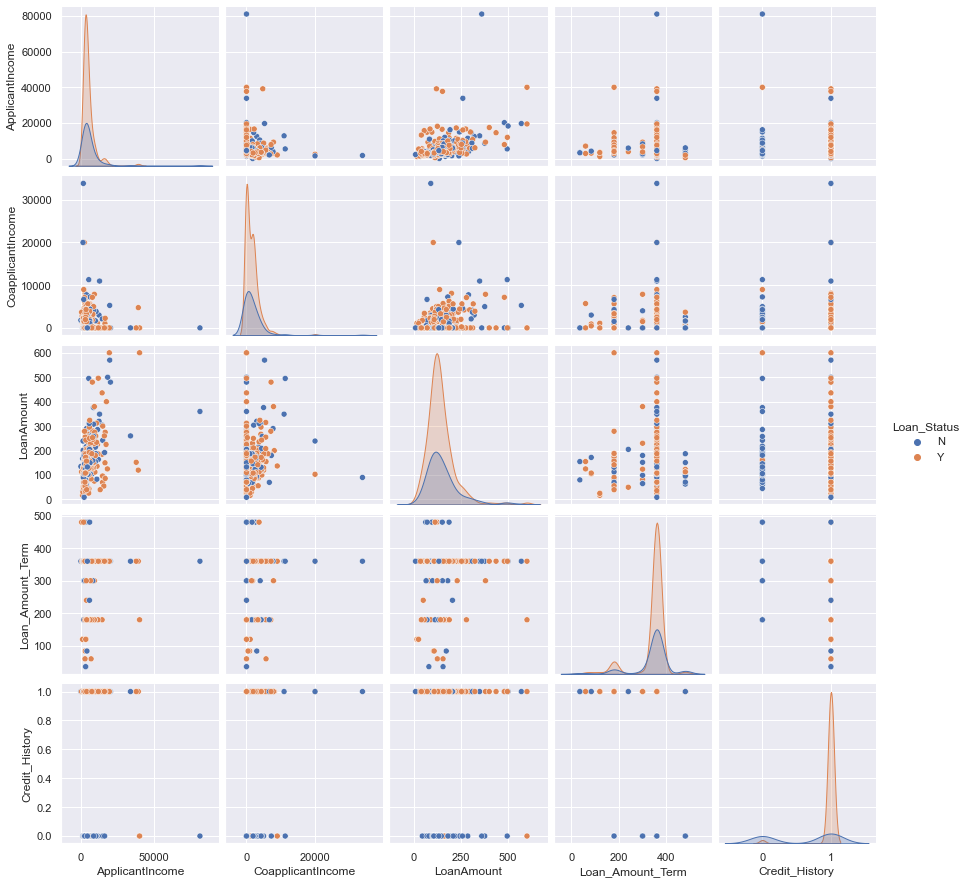

In [58]:
sns.pairplot(data=insurance.dropna(), hue='Loan_Status')

plt.show()

The pair plot above shows some correlation between `LoanAmount` and `ApplicantIncome`and `LoanAmount` and `CoapplicantIncome`. Adding the `Loan_Status` as hue to the graph did not reveal anything of significance except for the `Credit_History` where it can be seen that having `Credit_History = 0` is highly associated with `Loan_Status = No` and having `Credit_History = 1` is highly associated with `Loan_Status = Yes`.

### Discrete Variables

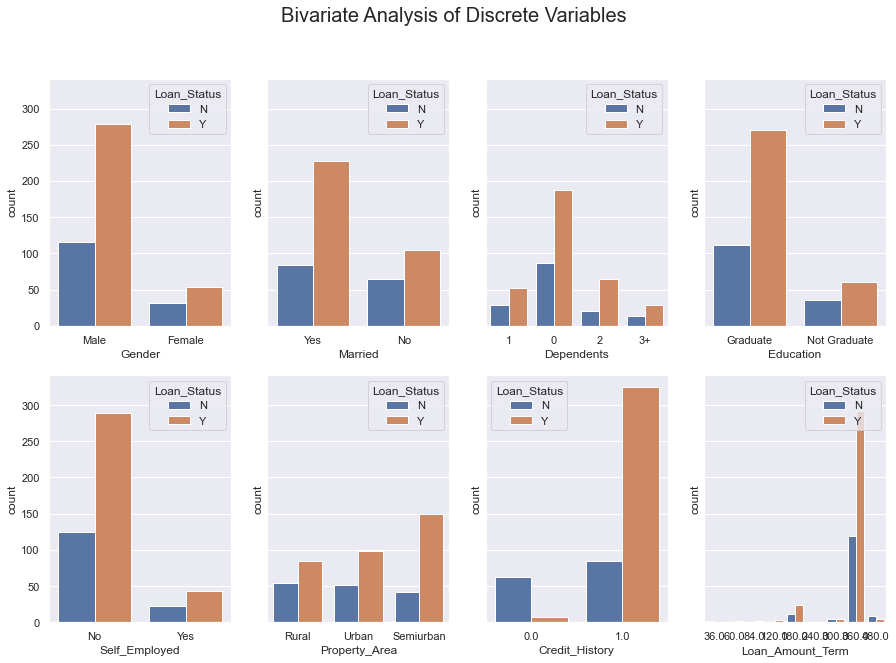

In [59]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10), sharey=True)
fig.suptitle('Bivariate Analysis of Discrete Variables', fontsize=20)

sns.countplot(ax=axes[0,0], data=insurance.dropna(), x='Gender', hue='Loan_Status')
sns.countplot(ax=axes[0,1], data=insurance.dropna(), x='Married', hue='Loan_Status')
sns.countplot(ax=axes[0,2], data=insurance.dropna(), x='Dependents', hue='Loan_Status')
sns.countplot(ax=axes[0,3], data=insurance.dropna(), x='Education', hue='Loan_Status')

sns.countplot(ax=axes[1,0], data=insurance.dropna(), x='Self_Employed', hue='Loan_Status')
sns.countplot(ax=axes[1,1], data=insurance.dropna(), x='Property_Area', hue='Loan_Status')
sns.countplot(ax=axes[1,2], data=insurance.dropna(), x='Credit_History', hue='Loan_Status')
sns.countplot(ax=axes[1,3], data=insurance.dropna(), x='Loan_Amount_Term', hue='Loan_Status')

plt.show()

The graph shows that a lot of applicants having the following characteristics were approved of their loans:

- Gender: **Male**
- Married: **Yes**
- Dependents: **0**
- Education: **Graduate**
- Self_Employed: **No**
- Property_Area: **Semiurban**
- Credit_History: **1**
- Loan_Amount_Term: **360**

However, we still don't know if this difference is statistically significant since there are also more applicants who have the afore mentioned characteristics. For example, there are more male applicants than female. Males are more likely to be approved of their loans just because there are more male applicants. This is more clearly seen if the numbers are expressed as percentages as shown in the cross table below:

In [60]:
pd.crosstab(insurance.Loan_Status, insurance.Gender, normalize='columns').round(4)*100

Gender,Female,Male
Loan_Status,,
N,33.04,30.67
Y,66.96,69.33


We see that 67% and 69% of female and male applicants, respectively, have `Loan_Status = Y`. The difference in percentages is not significant enough to conclude that male applicants are granted loans more often than females. 

This explanation is also true to the other variables: `Married`, `Dependents`, `Education`, `Self_Employed`, and `Property_Area`. However, this does not apply to `Credit_History` where the difference between the number of `Loan_Status = Y` and `Loan_Status = N` is overwhelming.

In [61]:
pd.crosstab(insurance.Loan_Status, insurance.Credit_History, normalize='columns').round(4)*100

Credit_History,0.0,1.0
Loan_Status,,
N,92.13,20.42
Y,7.87,79.58


92% of loan applications without credit history (Credit_History = 0) were not approved and 80% of loan applications with credit history (Credit_History = 1 were approved. We can see already that `Credit_History` is a good predictor of `Loan_Status`.

In [62]:
insurance['Loan_Amount_Term'].value_counts(normalize=True).round(4)*100

360.0    85.33
180.0     7.33
480.0     2.50
300.0     2.17
240.0     0.67
84.0      0.67
120.0     0.50
60.0      0.33
36.0      0.33
12.0      0.17
Name: Loan_Amount_Term, dtype: float64

Looking at the `Loan_Amount_Term`, 85% of all applications have 360-month `Loan_Amount_Term`. There are nine more `Loan_Amount_Term` options but they are significantly less popular than the 360-month term. 

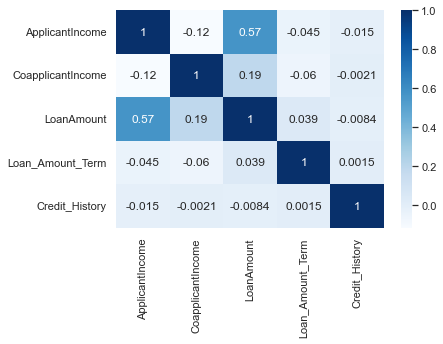

In [63]:
sns.heatmap(insurance.corr(), annot=True, cmap='Blues')
plt.show()

## Data Cleaning, Imputation, Feature Engineering and Preprocessing

### Cleaning

The categorical columns have the following values:

In [64]:
for col in insurance.select_dtypes(include='object').columns:
    print(col, insurance.select_dtypes(include='object')[col].unique())

Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes' nan]
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


Convert the categorical columns into numeric (dummy coding):

In [65]:
code_numeric = {
    'Male':1,
    'Female':0,
    'Graduate':1,
    'Not Graduate':0,
    'Yes':1,
    'No':0,
    'Y':1,
    'N':0
}

insurance = insurance.applymap(lambda x: code_numeric.get(x) if x in code_numeric else x)
test = test.applymap(lambda x: code_numeric.get(x) if x in code_numeric else x)
insurance.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


The `Dependent` columns was converted to show only whether an applicant has dependent or not. In the same way the `Loan_Amount_Term` will now only show whether the loan term is `360` months or `other`.

In [66]:
mapp_dep = {'0':0,'1':1,'2':2,'3+':3}
mapp_lt = {
    360.0: '360', 
    180.0: 'other', 
    480.0: 'other', 
    300.0: 'other', 
    84.0: 'other', 
    240.0: 'other', 
    120.0: 'other', 
    36.0: 'other', 
    60.0: 'other', 
    12.0: 'other'
}

insurance['Dependents'] = insurance['Dependents'].map(mapp_dep)
# insurance['Loan_Amount_Term'] = insurance['Loan_Amount_Term'].map(mapp_lt)

test['Dependents'] = test['Dependents'].map(mapp_dep)
# test['Loan_Amount_Term'] = test['Loan_Amount_Term'].map(mapp_lt)

insurance.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [67]:
for col in insurance.select_dtypes(include='object').columns:
    print(col, insurance.select_dtypes(include='object')[col].unique())

Property_Area ['Urban' 'Rural' 'Semiurban']


### Missing Values

Count the number of missing values per column.

In [68]:
null_count = insurance.isnull().sum()
percentage = insurance.isnull().sum()*100/insurance.shape[0]
pd.concat([null_count, percentage], axis=1, keys=['null_count','percentage']).sort_values(by='percentage',ascending=False)

,null_count,percentage
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000


Perform simple imputation of missing values.

In [69]:
# fill missing `Gender` values with the mode
insurance.Gender.fillna(insurance.Gender.mode()[0],inplace=True)
test.Gender.fillna(test.Gender.mode()[0],inplace=True)

# fill missing `Married` values with the mode
insurance.Married.fillna(insurance.Married.mode()[0],inplace=True)
test.Married.fillna(test.Married.mode()[0],inplace=True)

# fill missing `Dependents` values with the mode
insurance.Dependents.fillna(insurance.Dependents.mode()[0],inplace=True)
test.Dependents.fillna(test.Dependents.mode()[0],inplace=True)

# fill missing `Self_Employed` values with the mode
insurance.Self_Employed.fillna(insurance.Self_Employed.mode()[0],inplace=True)
test.Self_Employed.fillna(test.Self_Employed.mode()[0],inplace=True)

# fill missing `LoanAmount` values with the median
insurance.LoanAmount.fillna(insurance.LoanAmount.median(),inplace=True)
test.LoanAmount.fillna(test.LoanAmount.median(),inplace=True)

# fill missing `Loan_Amount_Term` values with the mode
insurance.Loan_Amount_Term.fillna(insurance.Loan_Amount_Term.mode()[0],inplace=True)
test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mode()[0],inplace=True)

# fill missing `Credit_History` values with the mode
insurance.Credit_History.fillna(insurance.Credit_History.mode()[0],inplace=True)
test.Credit_History.fillna(test.Credit_History.mode()[0],inplace=True)

In [70]:
insurance.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Feature Engineering

In [71]:
insurance['Total_Income'] = insurance['ApplicantIncome'] + insurance['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']
insurance.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [72]:
insurance['Total_Income_Log'] = np.log(insurance['Total_Income'])
insurance['Loan_Amount_Log'] = np.log(insurance['LoanAmount'])

test['Total_Income_Log'] = np.log(test['Total_Income'])
test['Loan_Amount_Log'] = np.log(test['LoanAmount'])
insurance.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_Log,Loan_Amount_Log
0,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0,8.674026,4.852030
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,8.714568,4.852030
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,8.006368,4.189655
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,8.505323,4.787492
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,8.699515,4.948760


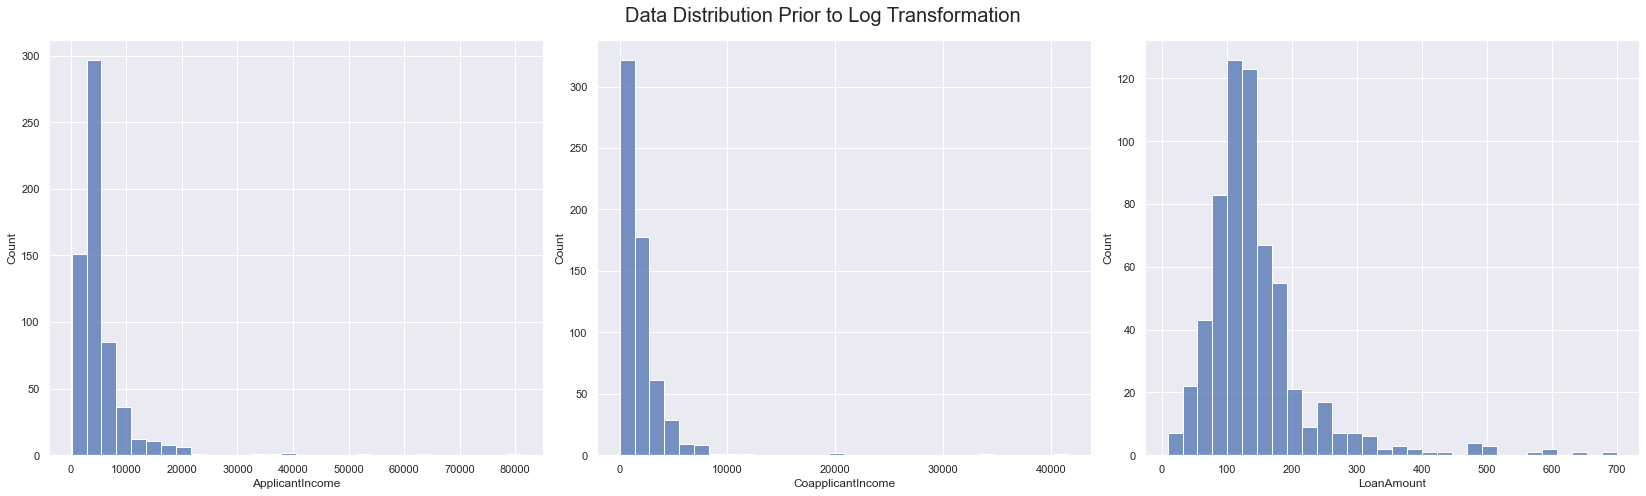

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(23, 7))
fig.suptitle('Data Distribution Prior to Log Transformation', fontsize=20)

sns.histplot(data=insurance, x='ApplicantIncome', bins=30, ax=axes[0])
sns.histplot(data=insurance, x='CoapplicantIncome', bins=30, ax=axes[1])
sns.histplot(data=insurance, x='LoanAmount', bins=30, ax=axes[2])

fig.tight_layout(pad=1.0)
plt.show()

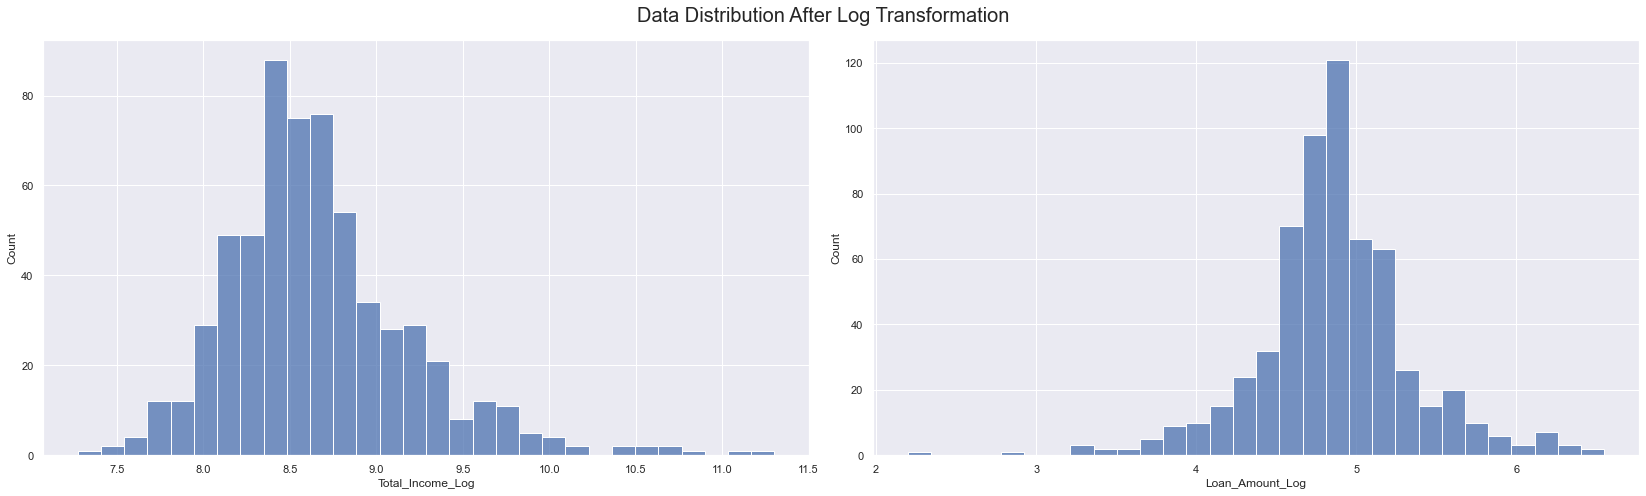

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(23, 7))
fig.suptitle('Data Distribution After Log Transformation', fontsize=20)

sns.histplot(data=insurance, x='Total_Income_Log', bins=30, ax=axes[0])
sns.histplot(data=insurance, x='Loan_Amount_Log', bins=30, ax=axes[1])

fig.tight_layout(pad=1.0)
plt.show()

In [75]:
insurance.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_Log,Loan_Amount_Log
0,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0,8.674026,4.852030
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,8.714568,4.852030
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,8.006368,4.189655
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,8.505323,4.787492
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,8.699515,4.948760


In [76]:
insurance.drop(['LoanAmount', 'ApplicantIncome','CoapplicantIncome', 'Total_Income'], axis=1, inplace=True)
test.drop(['LoanAmount', 'ApplicantIncome','CoapplicantIncome', 'Total_Income'], axis=1, inplace=True)

insurance.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income_Log,Loan_Amount_Log
0,1.0,0.0,0.0,1,0.0,360.0,1.0,Urban,1,8.674026,4.852030
1,1.0,1.0,1.0,1,0.0,360.0,1.0,Rural,0,8.714568,4.852030
2,1.0,1.0,0.0,1,1.0,360.0,1.0,Urban,1,8.006368,4.189655
3,1.0,1.0,0.0,0,0.0,360.0,1.0,Urban,1,8.505323,4.787492
4,1.0,0.0,0.0,1,0.0,360.0,1.0,Urban,1,8.699515,4.948760


Correct the data type of the columns.

In [77]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    float64
 1   Married           614 non-null    float64
 2   Dependents        614 non-null    float64
 3   Education         614 non-null    int64  
 4   Self_Employed     614 non-null    float64
 5   Loan_Amount_Term  614 non-null    float64
 6   Credit_History    614 non-null    float64
 7   Property_Area     614 non-null    object 
 8   Loan_Status       614 non-null    int64  
 9   Total_Income_Log  614 non-null    float64
 10  Loan_Amount_Log   614 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 52.9+ KB


In [78]:
insurance = insurance.astype(dtype={
    'Gender':'int32', 
    'Married':'int32', 
    'Dependents':'int32',
    'Education':'int32',
    'Self_Employed':'int32',
    'Credit_History':'int32'
})

test = test.astype(dtype={
    'Gender':'int32', 
    'Married':'int32', 
    'Dependents':'int32',
    'Education':'int32',
    'Self_Employed':'int32',
    'Credit_History':'int32'
})
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    int32  
 1   Married           614 non-null    int32  
 2   Dependents        614 non-null    int32  
 3   Education         614 non-null    int32  
 4   Self_Employed     614 non-null    int32  
 5   Loan_Amount_Term  614 non-null    float64
 6   Credit_History    614 non-null    int32  
 7   Property_Area     614 non-null    object 
 8   Loan_Status       614 non-null    int64  
 9   Total_Income_Log  614 non-null    float64
 10  Loan_Amount_Log   614 non-null    float64
dtypes: float64(3), int32(6), int64(1), object(1)
memory usage: 38.5+ KB


In [79]:
insurance.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income_Log,Loan_Amount_Log
458,1,0,2,1,0,360.0,1,Rural,1,8.378850,4.912655
597,1,0,0,1,0,360.0,0,Semiurban,0,8.002025,4.477337
354,0,1,0,1,0,360.0,1,Semiurban,1,7.982075,4.867534
609,0,0,0,1,0,360.0,1,Rural,1,7.972466,4.262680
310,0,0,0,1,0,360.0,1,Semiurban,1,7.978311,4.430817


In [80]:
def dummify(data, columns):
    for col in columns:
        x = pd.get_dummies(data[col],prefix=col,drop_first=True)
        data = data.drop(col, 1)
        data = pd.concat([data, x], axis=1)
    return data

In [81]:
insurance = dummify(insurance,['Property_Area'])
test = dummify(test,['Property_Area'])

In [82]:
insurance.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income_Log,Loan_Amount_Log,Property_Area_Semiurban,Property_Area_Urban
428,1,1,0,1,0,360.0,1,1,7.984844,4.465908,0,0
548,0,0,0,1,0,360.0,0,0,8.517193,4.634729,1,0
130,1,0,0,1,1,480.0,1,1,9.911753,6.476972,0,1
380,1,1,0,1,0,360.0,1,1,8.671287,4.852030,1,0
60,1,1,0,1,0,360.0,1,1,8.747670,4.787492,0,1


### Class Imbalance

In [83]:
insurance.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [84]:
loan_stat_0 = insurance[insurance['Loan_Status'] == 0]

In [85]:
loan_stat_0.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income_Log,Loan_Amount_Log,Property_Area_Semiurban,Property_Area_Urban
256,1,0,0,0,0,360.0,0,0,8.706987,4.744932,0,0
438,1,0,0,1,1,360.0,0,0,9.251098,5.231109,0,1
518,1,0,0,1,0,360.0,1,0,8.794522,5.220356,1,0


In [86]:
insurance_balanced = pd.concat([insurance, loan_stat_0], axis=0)

In [87]:
insurance_balanced = pd.concat([insurance_balanced, loan_stat_0.sample(422-384)], axis=0)

In [88]:
insurance_balanced.Loan_Status.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [89]:
insurance_balanced.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income_Log,Loan_Amount_Log,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,360.0,1,1,8.674026,4.852030,0,1
1,1,1,1,1,0,360.0,1,0,8.714568,4.852030,0,0
2,1,1,0,1,1,360.0,1,1,8.006368,4.189655,0,1
3,1,1,0,0,0,360.0,1,1,8.505323,4.787492,0,1
4,1,0,0,1,0,360.0,1,1,8.699515,4.948760,0,1


### X and Y

In [90]:
insurance_balanced.head(1)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income_Log,Loan_Amount_Log,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,360.0,1,1,8.674026,4.85203,0,1


In [91]:
# X = insurance_balanced.drop('Loan_Status', axis=1)
# y = insurance_balanced['Loan_Status']

X = insurance.drop('Loan_Status', axis=1)
y = insurance['Loan_Status']

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [93]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Total_Income_Log,Loan_Amount_Log,Property_Area_Semiurban,Property_Area_Urban
90,1,1,0,1,0,360.0,1,8.675564,4.875197,1,0
533,1,0,1,1,0,360.0,1,9.328123,5.278115,1,0
452,1,1,0,1,0,360.0,0,8.644883,5.003946,0,0
355,0,0,0,1,0,180.0,1,8.246172,4.753590,0,1
266,1,1,2,1,0,360.0,1,8.715224,5.010635,1,0


#### Scaling features

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train.loc[:, ['Loan_Amount_Term','Total_Income_Log','Loan_Amount_Log']] = sc.fit_transform(X_train.loc[:, ['Loan_Amount_Term','Total_Income_Log','Loan_Amount_Log']])
X_test.loc[:, ['Loan_Amount_Term','Total_Income_Log','Loan_Amount_Log']] = sc.fit_transform(X_test.loc[:, ['Loan_Amount_Term','Total_Income_Log','Loan_Amount_Log']])

test.loc[:, ['Loan_Amount_Term','Total_Income_Log','Loan_Amount_Log']] = sc.fit_transform(test.loc[:, ['Loan_Amount_Term','Total_Income_Log','Loan_Amount_Log']])

## Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(max_iter=200)
classifier_LR.fit(X_train, y_train)

y_pred_LR = classifier_LR.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred_LR)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_LR))
print('F1 Score:', f1_score(y_test, y_pred_LR))
print('Precision:', precision_score(y_test, y_pred_LR))
print('Recall:', recall_score(y_test, y_pred_LR))

[[14 19]
 [ 2 88]]
Accuracy: 0.8292682926829268
F1 Score: 0.8934010152284264
Precision: 0.822429906542056
Recall: 0.9777777777777777


## K-Nearest Neighbors

In [96]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_train, y_train)

y_pred_KNN = classifier_KNN.predict(X_test)

cm = confusion_matrix(y_test, y_pred_KNN)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_KNN))
print('F1 Score:', f1_score(y_test, y_pred_KNN))
print('Precision:', precision_score(y_test, y_pred_KNN))
print('Recall:', recall_score(y_test, y_pred_KNN))

[[18 15]
 [10 80]]
Accuracy: 0.7967479674796748
F1 Score: 0.8648648648648649
Precision: 0.8421052631578947
Recall: 0.8888888888888888


## Support Vector Machine

In [97]:
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_train, y_train)

y_pred_SVM = classifier_SVM.predict(X_test)

cm = confusion_matrix(y_test, y_pred_SVM)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_SVM))
print('F1 Score:', f1_score(y_test, y_pred_SVM))
print('Precision:', precision_score(y_test, y_pred_SVM))
print('Recall:', recall_score(y_test, y_pred_SVM))

[[14 19]
 [ 2 88]]
Accuracy: 0.8292682926829268
F1 Score: 0.8934010152284264
Precision: 0.822429906542056
Recall: 0.9777777777777777


## Support Vector Machine - Kernel

In [98]:
from sklearn.svm import SVC
classifier_Kernel = SVC(kernel = 'rbf', random_state = 0)
classifier_Kernel.fit(X_train, y_train)

y_pred_Kernel = classifier_Kernel.predict(X_test)

cm = confusion_matrix(y_test, y_pred_Kernel)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_Kernel))
print('F1 Score:', f1_score(y_test, y_pred_Kernel))
print('Precision:', precision_score(y_test, y_pred_Kernel))
print('Recall:', recall_score(y_test, y_pred_Kernel))

[[14 19]
 [ 3 87]]
Accuracy: 0.8211382113821138
F1 Score: 0.8877551020408163
Precision: 0.8207547169811321
Recall: 0.9666666666666667


## Naive Bayes

In [99]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

y_pred_NB = classifier_NB.predict(X_test)

cm = confusion_matrix(y_test, y_pred_NB)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_NB))
print('F1 Score:', f1_score(y_test, y_pred_NB))
print('Precision:', precision_score(y_test, y_pred_NB))
print('Recall:', recall_score(y_test, y_pred_NB))

[[15 18]
 [ 2 88]]
Accuracy: 0.8373983739837398
F1 Score: 0.8979591836734695
Precision: 0.8301886792452831
Recall: 0.9777777777777777


## Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier
classifier_D3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_D3.fit(X_train, y_train)

y_pred_D3 = classifier_D3.predict(X_test)

cm = confusion_matrix(y_test, y_pred_D3)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_D3))
print('F1 Score:', f1_score(y_test, y_pred_D3))
print('Precision:', precision_score(y_test, y_pred_D3))
print('Recall:', recall_score(y_test, y_pred_D3))

[[23 10]
 [24 66]]
Accuracy: 0.7235772357723578
F1 Score: 0.7951807228915663
Precision: 0.868421052631579
Recall: 0.7333333333333333


## Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train)

y_pred_RF = classifier_RF.predict(X_test)

cm = confusion_matrix(y_test, y_pred_RF)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_RF))
print('F1 Score:', f1_score(y_test, y_pred_RF))
print('Precision:', precision_score(y_test, y_pred_RF))
print('Recall:', recall_score(y_test, y_pred_RF))

[[16 17]
 [ 9 81]]
Accuracy: 0.7886178861788617
F1 Score: 0.8617021276595744
Precision: 0.826530612244898
Recall: 0.9


## Perceptron

In [102]:
from sklearn.linear_model import Perceptron
classifier_Per = Perceptron(random_state = 0)
classifier_Per.fit(X_train, y_train)

y_pred_Per = classifier_Per.predict(X_test)

cm = confusion_matrix(y_test, y_pred_Per)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_Per))
print('F1 Score:', f1_score(y_test, y_pred_Per))
print('Precision:', precision_score(y_test, y_pred_Per))
print('Recall:', recall_score(y_test, y_pred_Per))

[[26  7]
 [39 51]]
Accuracy: 0.6260162601626016
F1 Score: 0.6891891891891893
Precision: 0.8793103448275862
Recall: 0.5666666666666667


In [103]:
from xgboost import XGBClassifier
classifier_XGB = XGBClassifier(random_state = 0)
classifier_XGB.fit(X_train, y_train)

y_pred_XGB = classifier_XGB.predict(X_test)

cm = confusion_matrix(y_test, y_pred_Per)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred_XGB))
print('F1 Score:', f1_score(y_test, y_pred_XGB))
print('Precision:', precision_score(y_test, y_pred_XGB))
print('Recall:', recall_score(y_test, y_pred_XGB))

[15:03:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[26  7]
 [39 51]]
Accuracy: 0.7642276422764228
F1 Score: 0.839779005524862
Precision: 0.8351648351648352
Recall: 0.8444444444444444


In [104]:
predictions_final = classifier_LR.predict(test)

predictions_final2 = []
for i in predictions_final:
    if i == 1:
        predictions_final2.append('Y')
    else:
        predictions_final2.append('N')

submit = pd.read_csv('sample_submission.csv')

submit.Loan_Status = predictions_final2
submit.to_csv('submit.csv',index=False)
submit.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
